## Иерархический кластерный анализ

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('/Users/d.kapanadze/Downloads/Учеба/ИТМО/1 семестр/Анализ данных на Python/Задачи на первую лабу/экономика городов/Econom_Cities_data.csv', sep=';')

df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Salary'] = df['Salary'].str.replace(',', '.').astype(float)



df.head()

,City,Work,Price,Salary
0,Amsterdam,1714,65.6,49.0
1,Athens,1792,53.8,30.4
2,Bogota,2152,37.9,11.5
3,Bombay,2052,30.3,5.3
4,Brussels,1708,73.8,50.5


Видим что числовые переменные имеют разный порядок(кол-во рабочих часов - тысячи, цены/зарплаты - десятки). Поэтому имеет смысл провести стандартизацию.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [72.5, 72.5, 100.0, 100.0],
  [33.75, 33.75, 86.25, 86.25],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [120.0, 120.0, 142.5, 142.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [131.25, 131.25, 173.75, 173.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [152.5, 152.5, 212.5, 212.5],
  [60.0, 60.0, 182.5, 182.5],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [250.0, 250.0, 291.25, 291.25],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.0, 375.0, 

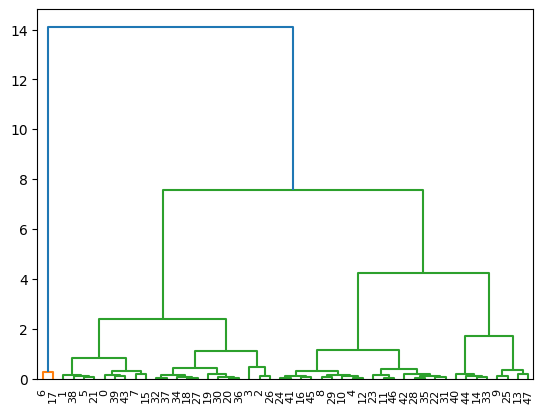

In [36]:
# Удаляем категориальную переменную
df2 = df.drop('City', axis=1)

# Стандартизируем данные
scaler = StandardScaler()
df_stand = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

clust = linkage(df_stand, 'ward', 'euclidean')
dendrogram(clust)

Видно что объекты в 6й и в 17й строках - выбросы

In [37]:
df.iloc[6]

City       Cairo
Work       -9999
Price       37.1
Salary   -9999.0
Name: 6, dtype: object

Действительно, очень не реалистичные значения параметров. Выкинем из датасета и проведём кластеризацию заново.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [115.0, 115.0, 141.25, 141.25],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [180.0, 180.0, 217.5, 217.5],
  [128.125, 128.125, 198.75, 198.75],
  [74.375, 74.375, 163.4375, 163.4375],
  [25.0, 25.0, 118.90625, 118.90625],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [262.5, 262.5, 293.75, 293.75],
  [325.0, 325.0, 335.0, 335.0],
  [375

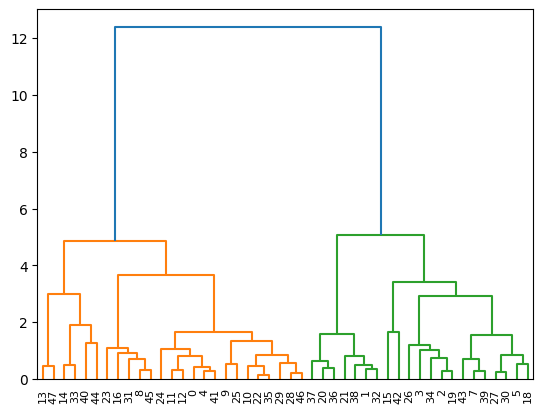

In [38]:
df3 = df2.drop([6, 17])
df_stand3 = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)


clust3 = linkage(df_stand3, 'ward', 'euclidean')
dendrogram(clust3, labels=df3.index.tolist())

Теперь отчётливо видим 2 кластера(оранжевый и зелёный)

In [39]:
# Присвоим каждому наблюдению в исходном датасете метку
# df.drop([6, 17], inplace=True)
df = df.query("Work > 0 and Salary > 0")
df['cluster'] = fcluster(clust3, 6, criterion='distance')

In [40]:
df.head()

,City,Work,Price,Salary,cluster
0,Amsterdam,1714,65.6,49.0,1
1,Athens,1792,53.8,30.4,2
2,Bogota,2152,37.9,11.5,2
3,Bombay,2052,30.3,5.3,2
4,Brussels,1708,73.8,50.5,1


In [41]:
# Попытаемся описать различие полученных кластеров
df.drop(['City'], axis=1).groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1789.240000,84.972000,59.032000
2,1987.857143,52.395238,16.347619


В 1м кластере число рабочих часов меньше, но при этом цены на продукты и зарплаты выше. Это толкает на мысль что 1й кластре представляет из себя города развитых стран. Посмотрим подробнее:

In [42]:
df.query("cluster == 1")

,City,Work,Price,Salary,cluster
0,Amsterdam,1714,65.6,49.0,1
4,Brussels,1708,73.8,50.5,1
8,Chicago,1924,73.9,61.9,1
9,Copenhagen,1717,91.3,62.9,1
10,Dublin,1759,76.0,41.4,1
11,Dusseldorf,1693,78.5,60.2,1
12,Frankfurt,1650,74.5,60.4,1
13,Geneva,1880,95.9,90.3,1
14,Helsinki,1667,113.6,66.6,1
16,Houston,1978,71.9,46.3,1


Действительно, в основном в 1м кластере находятся города европы.

In [43]:
df.query("cluster == 2")

,City,Work,Price,Salary,cluster
1,Athens,1792,53.8,30.4,2
2,Bogota,2152,37.9,11.5,2
3,Bombay,2052,30.3,5.3,2
5,Buenos_Aires,1971,56.1,12.5,2
7,Caracas,2041,61.0,10.9,2
15,Hong_Kong,2375,63.8,27.8,2
18,Johannesburg,1945,51.1,24.0,2
19,Kuala_Lumpur,2167,43.5,9.9,2
20,Lagos,1786,45.2,2.7,2
21,Lisbon,1742,56.2,18.8,2


Во 2м кластере ситуация не однозначная: города сильно различаются по кол-ву рабочих часов в году и по зарплате. 

Попробуем разделить данные на 3 кластера.

In [44]:
df['cluster2'] = fcluster(clust3, 3, criterion='maxclust')

In [45]:
df.drop(['City', 'cluster'], axis=1).groupby('cluster2').mean()

,Work,Price,Salary
cluster2,,,
1,1789.240000,84.972000,59.032000
2,1798.857143,50.942857,19.214286
3,2082.357143,53.121429,14.914286


In [46]:
df.query("cluster2 == 1").reset_index(drop=True)

,City,Work,Price,Salary,cluster,cluster2
0,Amsterdam,1714,65.6,49.0,1,1
1,Brussels,1708,73.8,50.5,1,1
2,Chicago,1924,73.9,61.9,1,1
3,Copenhagen,1717,91.3,62.9,1,1
4,Dublin,1759,76.0,41.4,1,1
5,Dusseldorf,1693,78.5,60.2,1,1
6,Frankfurt,1650,74.5,60.4,1,1
7,Geneva,1880,95.9,90.3,1,1
8,Helsinki,1667,113.6,66.6,1,1
9,Houston,1978,71.9,46.3,1,1


In [47]:
df.query("cluster2 == 2").sort_values(by='Salary').reset_index(drop=True)

,City,Work,Price,Salary,cluster,cluster2
0,Lagos,1786,45.2,2.7,2,2
1,Rio_de_Janeiro,1749,46.3,10.5,2,2
2,San_Paulo,1856,48.9,11.1,2,2
3,Lisbon,1742,56.2,18.8,2,2
4,Nicosia,1825,47.9,28.3,2,2
5,Athens,1792,53.8,30.4,2,2
6,Seoul,1842,58.3,32.7,2,2


In [48]:
df.query("cluster2 == 3").sort_values(by='Salary').reset_index(drop=True)

,City,Work,Price,Salary,cluster,cluster2
0,Manila,2268,40.0,4.0,2,3
1,Bombay,2052,30.3,5.3,2,3
2,Mexico_City,1944,49.8,5.7,2,3
3,Nairobi,1958,45.0,5.8,2,3
4,Kuala_Lumpur,2167,43.5,9.9,2,3
5,Caracas,2041,61.0,10.9,2,3
6,Bogota,2152,37.9,11.5,2,3
7,Buenos_Aires,1971,56.1,12.5,2,3
8,Panama,2078,49.2,13.8,2,3
9,Singpore,2042,64.4,16.1,2,3


Стало лучше. Мы можем увидеть чёткое различие между 2м и 3м кластером - в городах из 3го кластера рабочих часов не меньше 2000.
Теперь описание кластеров будет таким:

1 - мало рабочих часов, высокие цены, высокие зп(города западной Европы и США)

2 - столько же рабочих часов как и в 1м, но ниже цены и зп(города стран 3го мира/стран с кризисом)

3 - большее кол-во рабочих часов, но цены и зп как во 2м кластере(преимущественно города азии - на уровне культуры принято много работать)